In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = {'X': np.random.rand(100),
        'Y': np.random.rand(100),
        'target': np.random.randint(0, 2, 100)}  # Binary target variable
df = pd.DataFrame(data)

print(df.head())


          X         Y  target
0  0.283561  0.579660       1
1  0.992418  0.004613       1
2  0.418258  0.956177       0
3  0.110876  0.639636       0
4  0.614927  0.335798       1


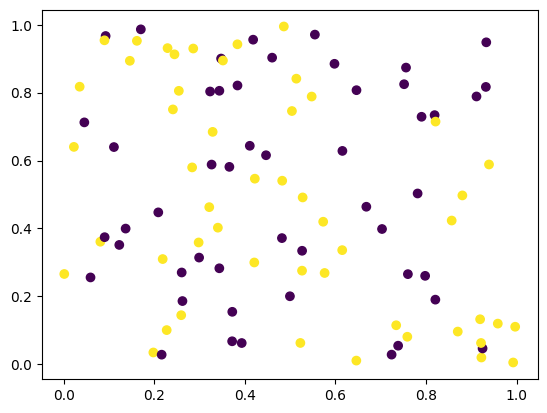

In [10]:
plt.scatter(df['X'],df['Y'],c=df['target'])

In [24]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.get_weights()

[array([[ 1.1875879 ,  1.1987036 ],
        [ 0.7189928 , -0.61115044]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0855086 ],
        [ 0.18646002]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
initial_weights = model.get_weights()

In [28]:
initial_weights[0]= np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1]= np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2]= np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3]= np.ones(model.get_weights()[3].shape)*0.5

In [29]:
model.set_weights(initial_weights)

In [30]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history=model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5000 - loss: 0.9484 - val_accuracy: 0.5000 - val_loss: 0.9834
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5078 - loss: 0.9244 - val_accuracy: 0.5000 - val_loss: 0.9784
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5117 - loss: 0.9237 - val_accuracy: 0.5000 - val_loss: 0.9734
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.9329 - val_accuracy: 0.5000 - val_loss: 0.9684
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5156 - loss: 0.9081 - val_accuracy: 0.5000 - val_loss: 0.9635
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5117 - loss: 0.9129 - val_accuracy: 0.5000 - val_loss: 0.9587
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5156 - loss: 0.8917 - val_accuracy: 0.5000 - val_loss: 0.9541
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4883 - loss: 0.9337 - val_accuracy: 0.5000 - val_loss

In [33]:
model.get_weights()

[array([[0.29136232, 0.29136232],
        [0.2893269 , 0.2893269 ]], dtype=float32),
 array([0.2876552, 0.2876552], dtype=float32),
 array([[0.2875724],
        [0.2875724]], dtype=float32),
 array([0.2581607], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

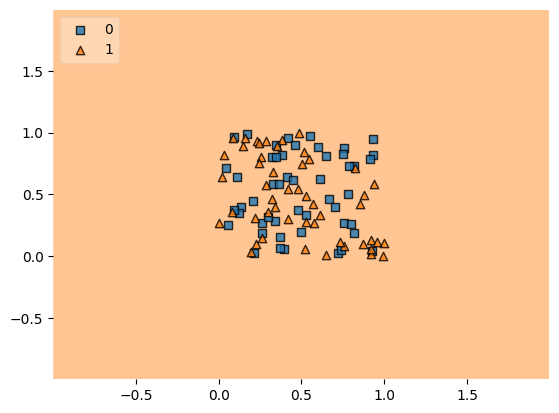

In [34]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,model,legend=2)

Xavier and He Weight Initialization

In [35]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
initial_weights = model.get_weights()

In [38]:
initial_weights[0]= np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1]= np.zeros(model.get_weights()[1].shape)
initial_weights[2]= np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3]= np.zeros(model.get_weights()[3].shape)
initial_weights[4]= np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5]= np.zeros(model.get_weights()[5].shape)
initial_weights[6]= np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7]= np.zeros(model.get_weights()[7].shape)
initial_weights[8]= np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9]= np.zeros(model.get_weights()[9].shape)

In [39]:
model.set_weights(initial_weights)

In [40]:
model.get_weights()

[array([[ 1.0454216 , -0.75286895,  1.3377048 ,  0.71930265,  0.96371984,
         -0.43082508,  0.7399876 ,  0.00284888,  0.69705474, -0.6956974 ],
        [-1.2673248 , -0.57468104,  1.5794767 , -0.03329199,  0.06182493,
         -0.79546887,  1.7523334 ,  0.89691484,  0.24648753, -0.48747975]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.06894916, -0.03563401, -0.3539656 , -0.4861392 ,  0.02549685,
         -0.4670941 ,  0.10363675, -0.12121445, -0.20294431,  0.24460462],
        [ 0.00478149, -0.0138695 , -0.12060642,  0.21827662,  0.0588122 ,
          0.1650057 ,  0.05181359,  0.16885121, -0.11407562, -0.12455236],
        [-0.2167397 ,  0.07859591, -0.03887584, -0.22908999,  0.19706772,
         -0.3350923 , -0.05363548,  0.01486074, -0.02540375,  0.25494644],
        [-0.4810662 ,  0.00236702,  0.3623751 ,  0.31626463, -0.36000824,
          0.3511033 , -0.2802049 , -0.24263316, -0.4467333 , -0.50923777],
        [ 0.37546

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5320 - loss: 0.6927 - val_accuracy: 0.4000 - val_loss: 0.6933
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5180 - loss: 0.6924 - val_accuracy: 0.4500 - val_loss: 0.6923
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4984 - loss: 0.6928 - val_accuracy: 0.4500 - val_loss: 0.6919
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4938 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4836 - loss: 0.6908 - val_accuracy: 0.5500 - val_loss: 0.6905
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4703 - loss: 0.6909 - val_accuracy: 0.4500 - val_loss: 0.6896
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5266 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5211 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss

In [42]:
model.get_weights()

[array([[ 0.9433948 , -0.724114  ,  1.2967789 ,  0.75062555,  0.991627  ,
         -0.47076407,  0.7153996 , -0.03341123,  0.70863056, -0.7173721 ],
        [-1.3747569 , -0.6155184 ,  1.5737848 , -0.06210455,  0.02107642,
         -0.7993805 ,  1.7287421 ,  0.92494   ,  0.26486588, -0.50855327]],
       dtype=float32),
 array([-0.10002847,  0.01411776, -0.05867174,  0.00523834,  0.00647066,
         0.00256203, -0.05091326,  0.01157989, -0.00245504,  0.00681633],
       dtype=float32),
 array([[ 0.0814445 , -0.07154875, -0.39688706, -0.48990515,  0.055492  ,
         -0.44648948,  0.12961295, -0.15237196, -0.24170345,  0.25254887],
        [-0.00796911, -0.00202873, -0.13746475,  0.22322173,  0.03275956,
          0.1321058 ,  0.02058087,  0.1651664 , -0.1495416 , -0.10703433],
        [-0.20500414,  0.06682213, -0.02377974, -0.23780149,  0.2185478 ,
         -0.30779558, -0.03284824,  0.02006867,  0.00366573,  0.24388072],
        [-0.4469623 , -0.0024844 ,  0.39279497,  0.34240162, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


<Axes: >

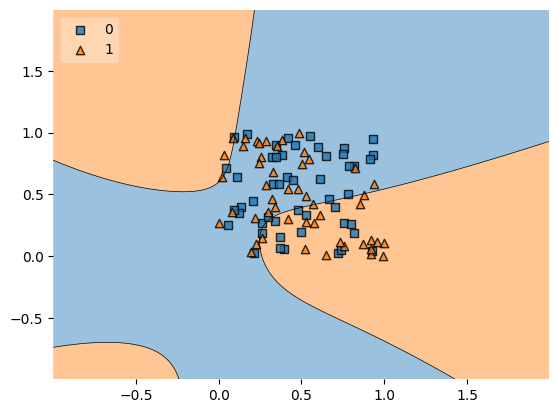

In [43]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,model,legend=2)

In [45]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)